**Titanic Survivability Prediction** 

**1. Describe the data used and how you got the data.**<br>
Answer: "Titanic - Machine Learning from Disaster" is the popular dataset in kaggle. The dataset contains 12 columns which have some information about the data. The "Survived" column represents whether a person can survive or not. Other columns like name, age, sex class also important to evaluate our machine learning algorithm.<br>
This dataset took from kaggle [Dataset](https://www.kaggle.com/c/titanic/data?select=train.csv)

In [1]:
# Load the dataset from google drive
from google.colab import drive
drive.mount("/content/gdrive")
print("Done! Mount to drive")

Mounted at /content/gdrive
Done! Mount to drive


**Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load the dateset
train_df = pd.read_csv("/content/gdrive/MyDrive/CSE445/train.csv")
test_df = pd.read_csv("/content/gdrive/MyDrive/CSE445/test.csv")

**Print data**

In [4]:
# Print some data from train test set
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


---
**2. Initial Exploration of the data (print data, visualize data). Find number of attributes, number of records in the data. Also find if there is any attribute which has missing data.**<br>
Answer: Here we find the values and descriptions of our data. We write query to find total number of attributes, shape of the data, also check is there any null value using isnull() function.

In [6]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
print("The Shape of the trainset:",train_df.shape)
print("The Shape of the testset:",test_df.shape)

The Shape of the trainset: (891, 12)
The Shape of the testset: (418, 11)


In [8]:
#Describe the dataset
train_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [9]:
test_df.describe

<bound method NDFrame.describe of      PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[418 rows x 11 columns]>

In [10]:
#check if is there any null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So there is null values presents in the trainset<br>
177 null in Age Column <br>
687 null in Cabin column

In [11]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

So there is null values presents in the testset<br>
86 null in Age Column <br>
327 null in Cabin column


3. Find correlation of data attributes and target variable (whether survived or not) to explore which attributes have most effects on output (target
variable).<br>
Answer: The target variable is the survival column, and we are looking for some relationships such as what age people survive the most, and what gender people survive, and so on.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


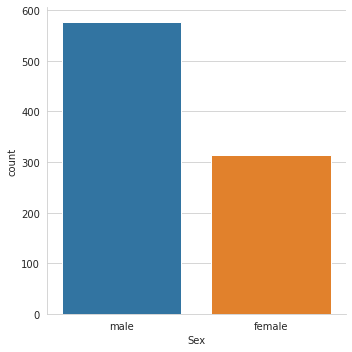

In [12]:
#Gender Plot
sns.catplot('Sex',data=train_df,kind='count')

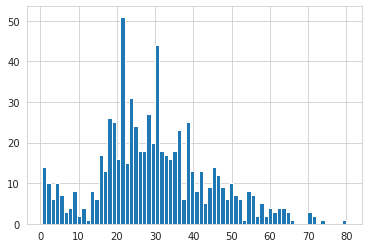

In [13]:
#Now let us look at the ages of the passengers.
train_df['Age'].hist(bins=70)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


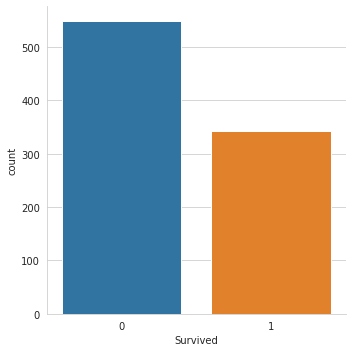

In [14]:
#Count the Number of Survivor
sns.catplot('Survived',data=train_df,kind='count')

**4.Compute any new attribute/feature from existing attributes [if necessary].
Explain how these new features contribute to the prediction of target
variable.**<br>
Answer: Here we need to computer new values for age, sex, cabin, embarked to some float values. Because in those columns the values are in the string. Our model can not work the string. So we need to manually convert each columns into floats values which helps to perform any algorithm with high accuray.

In [15]:
train_test_data = [train_df, test_df] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [16]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [17]:
# delete unnecessary feature from dataset
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [19]:
# Convert the Sex to Male:0, Female:1
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [20]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df["Age"].fillna(test_df.groupby("Title")["Age"].transform("median"), inplace=True)
train_df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Converting Numerical Age to Categorical Variable<br>
feature vector map:<br>
child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [22]:
train_df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [23]:
test_df.info

<bound method DataFrame.info of      PassengerId  Pclass  Sex   Age  ...      Fare  Cabin Embarked  Title
0            892       3    0  34.5  ...    7.8292    NaN        Q      0
1            893       3    1  47.0  ...    7.0000    NaN        S      2
2            894       2    0  62.0  ...    9.6875    NaN        Q      0
3            895       3    0  27.0  ...    8.6625    NaN        S      0
4            896       3    1  22.0  ...   12.2875    NaN        S      2
..           ...     ...  ...   ...  ...       ...    ...      ...    ...
413         1305       3    0  28.5  ...    8.0500    NaN        S      0
414         1306       1    1  39.0  ...  108.9000   C105        C      3
415         1307       3    0  38.5  ...    7.2500    NaN        S      0
416         1308       3    0  28.5  ...    8.0500    NaN        S      0
417         1309       3    0  10.0  ...   22.3583    NaN        C      3

[418 rows x 11 columns]>

In [24]:
train_df.shape

(891, 12)

In [25]:
test_df.shape

(418, 11)

In [26]:
for dataset in train_test_data:
    dataset.loc[(dataset['Age'] <= 16.0), 'Age'] = 0.0
    dataset.loc[(dataset['Age'] > 16.0) & (dataset['Age'] <= 26), 'Age'] = 1.0
    dataset.loc[(dataset['Age'] > 26.0) & (dataset['Age'] <= 36.0), 'Age'] = 2.0
    dataset.loc[(dataset['Age'] > 36.0) & (dataset['Age'] <= 62.0), 'Age'] = 3.0
    dataset.loc[ dataset['Age'] > 62.0, 'Age'] = 4.0

In [27]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


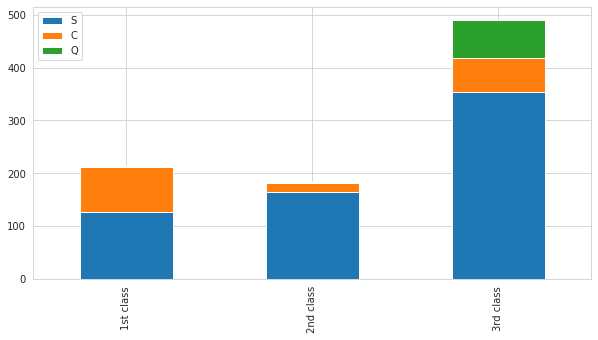

In [28]:
# filling missing values
Pclass1 = train_df[train_df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [29]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [30]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [31]:
# fill missing Fare with median fare for each Pclass
train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [32]:
#Cabins
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [33]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [34]:
# fill missing Fare with median fare for each Pclass
train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [35]:
#Handle FamilySize
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [36]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [37]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train_df = train_df.drop(features_drop, axis=1)
test_df = test_df.drop(features_drop, axis=1)
train_df = train_df.drop(['PassengerId'], axis=1)

In [38]:
#Separate targert column
train_data = train_df.drop('Survived', axis=1)
target = train_df['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [39]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,7.2500,2.0,0,0,0.4
1,1,1,3.0,71.2833,0.8,1,2,0.4
2,3,1,1.0,7.9250,2.0,0,1,0.0
3,1,1,2.0,53.1000,0.8,0,2,0.4
4,3,0,2.0,8.0500,2.0,0,0,0.0
5,3,0,2.0,8.4583,2.0,2,0,0.0
6,1,0,3.0,51.8625,1.6,0,0,0.0
7,3,0,0.0,21.0750,2.0,0,3,1.6
8,3,1,2.0,11.1333,2.0,0,2,0.8
9,2,1,0.0,30.0708,1.8,1,2,0.4


In [40]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,7.8292,2.0,2,0,0.0
1,893,3,1,3.0,7.0000,2.0,0,2,0.4
2,894,2,0,3.0,9.6875,2.0,2,0,0.0
3,895,3,0,2.0,8.6625,2.0,0,0,0.0
4,896,3,1,1.0,12.2875,2.0,0,2,0.8


**5. Select your classification model (try at least three model to find best one)**<br>
Answer: In this problem, used Logistic Regression, K-Neighbors Classifier,Decision Tree, Random Forest, Support vector machine(SVM)

**6. Calculate confusion matrix and show classification report using Scikit-learn library**<br>
Answer: Here plot the classification report and confusion matrix.

**Modelling**


In [41]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

**Assignment-02<br>Cross Validation (K-fold)**

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) #NumberOfFolds = 10

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2)

In [44]:
X_train.head(5)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
592,3,0,3.0,7.2500,2.0,0,0,0.0
446,2,1,0.0,19.5000,1.8,0,1,0.4
288,2,0,3.0,13.0000,1.8,0,0,0.0
434,1,0,3.0,55.9000,1.6,0,0,0.4
643,3,0,2.0,56.4958,2.0,0,0,0.0


In [45]:
X_test.head(5)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
185,1,0,2.0,50.0000,0.0,0,0,0.0
496,1,1,3.0,78.2667,1.2,1,1,0.4
16,3,0,0.0,29.1250,2.0,2,3,2.0
576,2,1,2.0,13.0000,1.8,0,1,0.0
459,3,0,2.0,7.7500,2.0,2,0,0.0


In [46]:
y_train.head(5)

592    0
446    1
288    1
434    0
643    1
Name: Survived, dtype: int64

Logistic Regression


In [47]:
Logi_classifier=LogisticRegression(random_state=0)
Logi_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_train_predict=Logi_classifier.predict(X_train)
y_test=Logi_classifier.predict(X_test)

Accuracy for training set is:  0.827247191011236
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       439
           1       0.79      0.75      0.77       273

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712





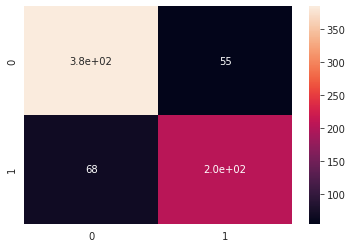

In [49]:
print('Accuracy for training set is: ',accuracy_score(y_train,y_train_predict))
print(classification_report(y_train, y_train_predict))

print("\n")

#Get the confusion matrix
cf_matrix = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cf_matrix, annot=True)

Decision Tree

In [50]:
dcT = DecisionTreeClassifier()
dcT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
y_train_predict=dcT.predict(X_train)
y_test=dcT.predict(X_test)

Accuracy for training set is:  0.9620786516853933
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       439
           1       0.98      0.92      0.95       273

    accuracy                           0.96       712
   macro avg       0.97      0.95      0.96       712
weighted avg       0.96      0.96      0.96       712





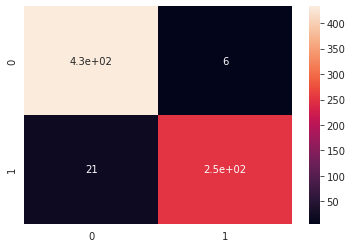

In [52]:
print('Accuracy for training set is: ',accuracy_score(y_train,y_train_predict))
print(classification_report(y_train, y_train_predict))

print("\n")

#Get the confusion matrix
cf_matrix = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cf_matrix, annot=True)

**Decision Tree with GridSearch**

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
parameters = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': [2, 3, 5, 10, 17],
'min_samples_split': [2, 3, 5, 7, 9],
'min_samples_leaf': [1,5,8,11],
'random_state' : [0,1,2,3,4,5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(estimator = model,
param_grid = parameters,
scoring = 'accuracy',
cv = 5,
verbose = 1)

In [ ]:
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36000 out of 36000 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
print(grid_search_dt.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')


In [ ]:
print(grid_search_dt.score(X_test, y_test))

0.88268156424581


Random Forest

In [53]:
ranF = RandomForestClassifier()
ranF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
y_train_predict=ranF.predict(X_train)
y_test=ranF.predict(X_test)

Accuracy for training set is:  0.9620786516853933
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       439
           1       0.97      0.93      0.95       273

    accuracy                           0.96       712
   macro avg       0.96      0.96      0.96       712
weighted avg       0.96      0.96      0.96       712





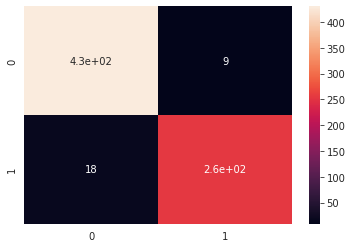

In [55]:
print('Accuracy for training set is: ',accuracy_score(y_train,y_train_predict))
print(classification_report(y_train, y_train_predict))

print("\n")

#Get the confusion matrix
cf_matrix = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cf_matrix, annot=True)

**Random Forest with GridSearch**

In [ ]:
modelRF = RandomForestClassifier()

In [ ]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 5, 10, 17],
    'criterion' :['gini', 'entropy']
}

In [ ]:
grid_search_rf = GridSearchCV(estimator = modelRF,
param_grid = param_grid,
scoring = 'accuracy',
cv = 5,
verbose = 1)

In [ ]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  3.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(grid_search_rf.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
print("With Grid Search: ",grid_search_rf.score(X_test, y_test))

With Grid Search:  0.8938547486033519


KNN

In [56]:
knc = KNeighborsClassifier(n_neighbors = 13)
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [57]:
y_train_predict=knc.predict(X_train)
y_test=knc.predict(X_test)

Accuracy for training set is:  0.7851123595505618
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       439
           1       0.72      0.72      0.72       273

    accuracy                           0.79       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.78      0.79      0.79       712





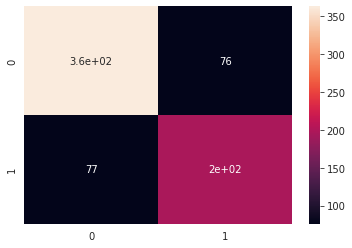

In [58]:
print('Accuracy for training set is: ',accuracy_score(y_train,y_train_predict))
print(classification_report(y_train, y_train_predict))

print("\n")

#Get the confusion matrix
cf_matrix = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cf_matrix, annot=True)

Suppert vector Machine (SVM)

In [59]:
svmclf = SVC()
svmclf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
y_train_predict=svmclf.predict(X_train)
y_test=svmclf.predict(X_test)

Accuracy for training set is:  0.6853932584269663
              precision    recall  f1-score   support

           0       0.68      0.93      0.78       439
           1       0.72      0.29      0.42       273

    accuracy                           0.69       712
   macro avg       0.70      0.61      0.60       712
weighted avg       0.69      0.69      0.64       712





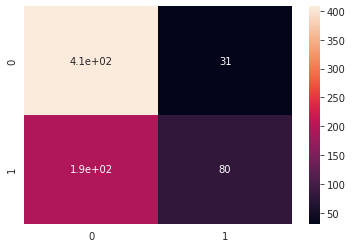

In [61]:
print('Accuracy for training set is: ',accuracy_score(y_train,y_train_predict))
print(classification_report(y_train, y_train_predict))

print("\n")

#Get the confusion matrix
cf_matrix = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cf_matrix, annot=True)

From all the classifier we can see the Decision Tree gave got Accuracy.
Let's save it and test the classifier on test set.

In [ ]:
# Testing
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test_df.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
#Look at the Submission file
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


**Apply PCA**

In [62]:
df_1 = train_data.loc[:,['Fare','Pclass']]
df_2 = test_df.loc[:,['Fare','Pclass']]

In [63]:
from sklearn.decomposition import PCA
pca =  PCA(n_components=1)
col_1 = pca.fit_transform(df_1)
col_2 = pca.fit_transform(df_2)

train_data['Mod_col_1']=col_1[:,0]
test_df['Mod_col_1']=col_2[:,0]

In [64]:
train_data=train_data.drop(['Fare','Pclass'], axis=1)
test_df=test_df.drop(['Fare','Pclass'], axis=1)

In [65]:
modelPCA = DecisionTreeClassifier()

---

END
